In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [5]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
from random import random

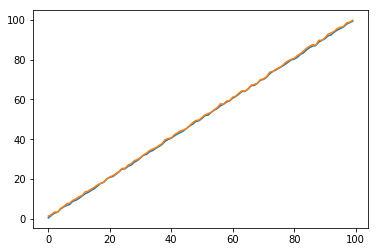

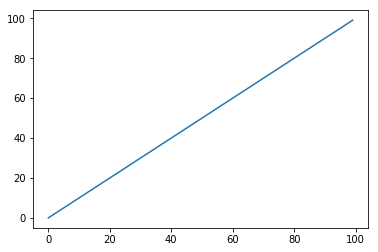

In [16]:
# contrived dataset with dependency
data = []
trend = []

for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    trend.append(i)
    
# data is clearly not stationary, which means endog for the lag term if deterministic trend is not included

plt.plot(data)
plt.show()
plt.plot(trend)
plt.show()

In [31]:
endog = VAR(data)
endog_results = endog.fit(maxlags=5, ic='aic')
endog_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Jul, 2019
Time:                     16:56:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.31588
Nobs:                     97.0000    HQIC:                  -4.53722
Log likelihood:          -33.9311    FPE:                 0.00921446
AIC:                     -4.68748    Det(Omega_mle):      0.00801580
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         2.181139         0.190703           11.437           0.000
L1.y1         0.361633         0.156948            2.304           0.021
L1.y2        -0.040870         0.120967           -0.338           0.735
L2.y1         0.209639

In [ ]:
# third lag of y1 is significant determinant of y2, which is clearly absurd

In [32]:
exog = VAR(data)
exog_results = exog.fit(maxlags=5, ic='aic', trend="ct")
exog_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 11, Jul, 2019
Time:                     16:57:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.49598
Nobs:                     97.0000    HQIC:                  -4.74895
Log likelihood:          -20.6215    FPE:                 0.00729971
AIC:                     -4.92067    Det(Omega_mle):      0.00622975
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.379897         0.511314           -0.743           0.457
trend         1.023404         0.193092            5.300           0.000
L1.y1        -0.006547         0.154140           -0.042           0.966
L1.y2        -0.024306

In [19]:
# now the results appear far more plausible. y1 is determined solely by the trend,
# as is the case in our data generating process. y2 is a perturbation on y1, which
# is also consistent with our data generating process

# Question: does the predictive performance between endog and exog model differ?
# In theory, the estimates of parameters in the endog model are not unbiased or even consistent,
# so the predictions should be plain wrong

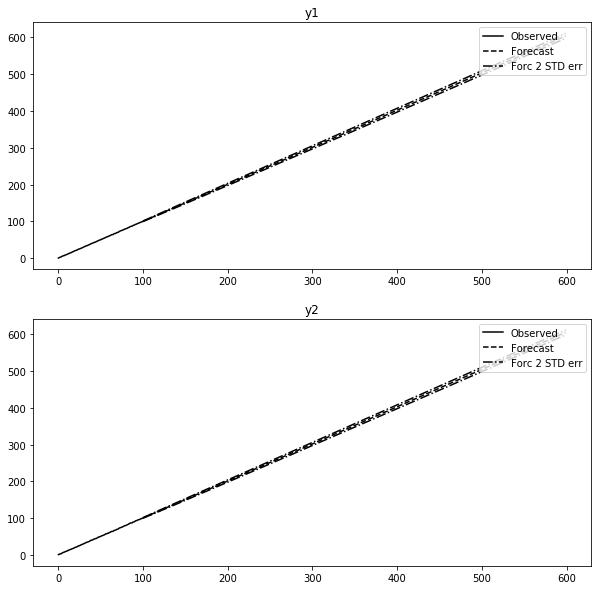

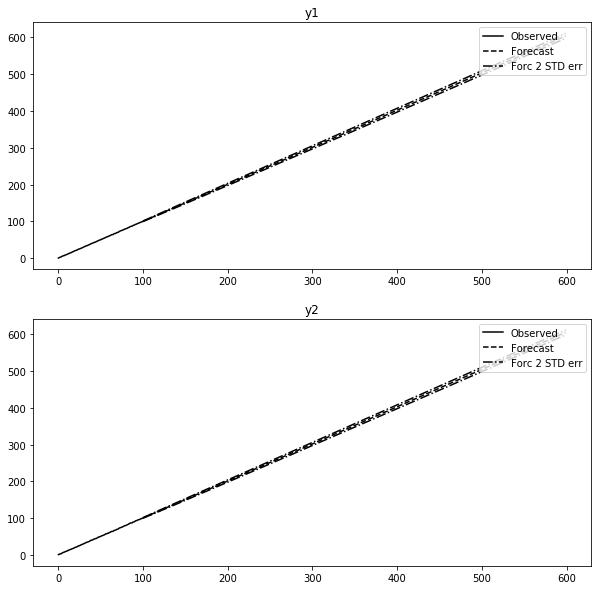

In [49]:
endog_results.plot_forecast(500)
# as can be seen, forecast confidence interval grows over time - basically random walk with drift

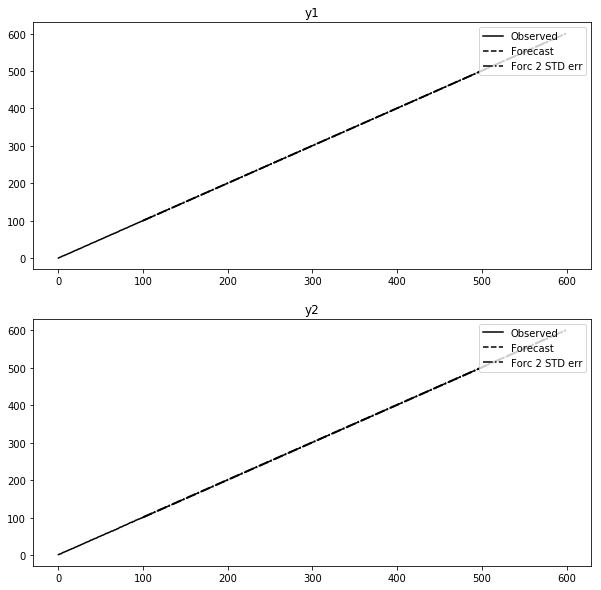

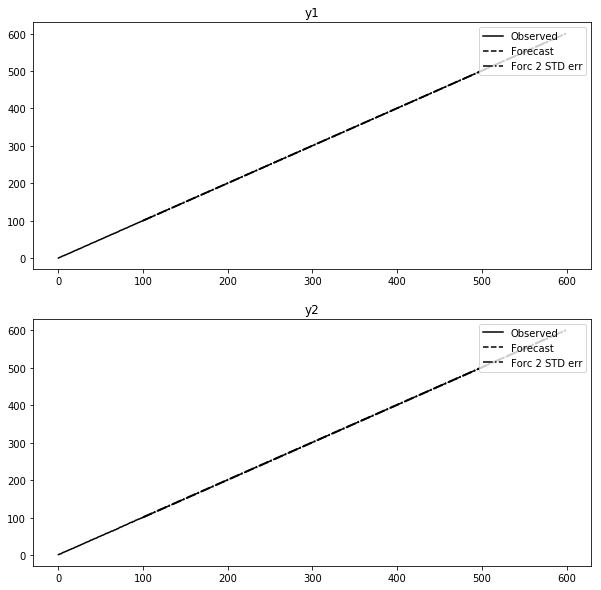

In [51]:
exog_results.plot_forecast(500)
# forecast confidence interval stays constant - which is characteristic of deterministic trend

In [56]:
print(endog_results.mse(50)[49])
print(exog_results.mse(50)[49])
# evident here again

[[1.17684032 1.18242539]
 [1.18242539 1.26842096]]
[[0.08192581 0.0862807 ]
 [0.0862807  0.17194784]]


In [58]:
print(endog_results.forecast_cov(50)[49])
print(exog_results.forecast_cov(50)[49])
# why is the mse same as the cov matrix? Because the bias of estimator for y is zero. (see prep course)

[[1.17684032 1.18242539]
 [1.18242539 1.26842096]]
[[0.08192581 0.0862807 ]
 [0.0862807  0.17194784]]


In [64]:
print(endog_results.forecast(data[-30:], 5))
print(endog_results.forecast(data, 5))
# this makes no difference

[[100.5213345  100.98303017]
 [101.45415804 101.9273077 ]
 [102.3743578  102.85447199]
 [103.45969123 103.94225559]
 [104.43856438 104.91730123]]
[[100.5213345  100.98303017]
 [101.45415804 101.9273077 ]
 [102.3743578  102.85447199]
 [103.45969123 103.94225559]
 [104.43856438 104.91730123]]


In [70]:
# out of sample forecasting

print("Actual:")
print(data[-25])
print("Forecast from endog:")
print(endog_results.forecast(data[:-29], steps=5)[4])
print("Forecast from exog:")
print(exog_results.forecast(data[:-29], steps=5)[4])
# forecast form exog is weird because trend is at 105...

Actual:
[75.62862514931275, 75.81271745077738]
Forecast from endog:
[75.26096075 75.72883336]
Forecast from exog:
[104.95547229 105.44979851]
